In [1]:
# Importações: bibliotecas para análise de dados, visualização e clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
# Carregamento do dataset Country-data (dados por país)
# Dica: verifique o caminho se estiver fora deste projeto
df = pd.read_csv('../data/raw/Country-data.csv')
print("Dimensão:", df.shape)
# Visualização inicial das primeiras linhas
df.head()


Dimensão: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Verificação de valores ausentes em cada coluna
# (ideal para decidir imputação/remoção antes do modelagem)
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
# Estatísticas descritivas das variáveis numéricas (arredondadas)
df.describe().round(0)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
mean,38.0,41.0,7.0,47.0,17145.0,8.0,71.0,3.0,12964.0
std,40.0,27.0,3.0,24.0,19278.0,11.0,9.0,2.0,18329.0
min,3.0,0.0,2.0,0.0,609.0,-4.0,32.0,1.0,231.0
25%,8.0,24.0,5.0,30.0,3355.0,2.0,65.0,2.0,1330.0
50%,19.0,35.0,6.0,43.0,9960.0,5.0,73.0,2.0,4660.0
75%,62.0,51.0,9.0,59.0,22800.0,11.0,77.0,4.0,14050.0
max,208.0,200.0,18.0,174.0,125000.0,104.0,83.0,7.0,105000.0


In [5]:
# Estatísticas descritivas transpostas (facilita leitura por variável)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<Figure size 1400x800 with 0 Axes>

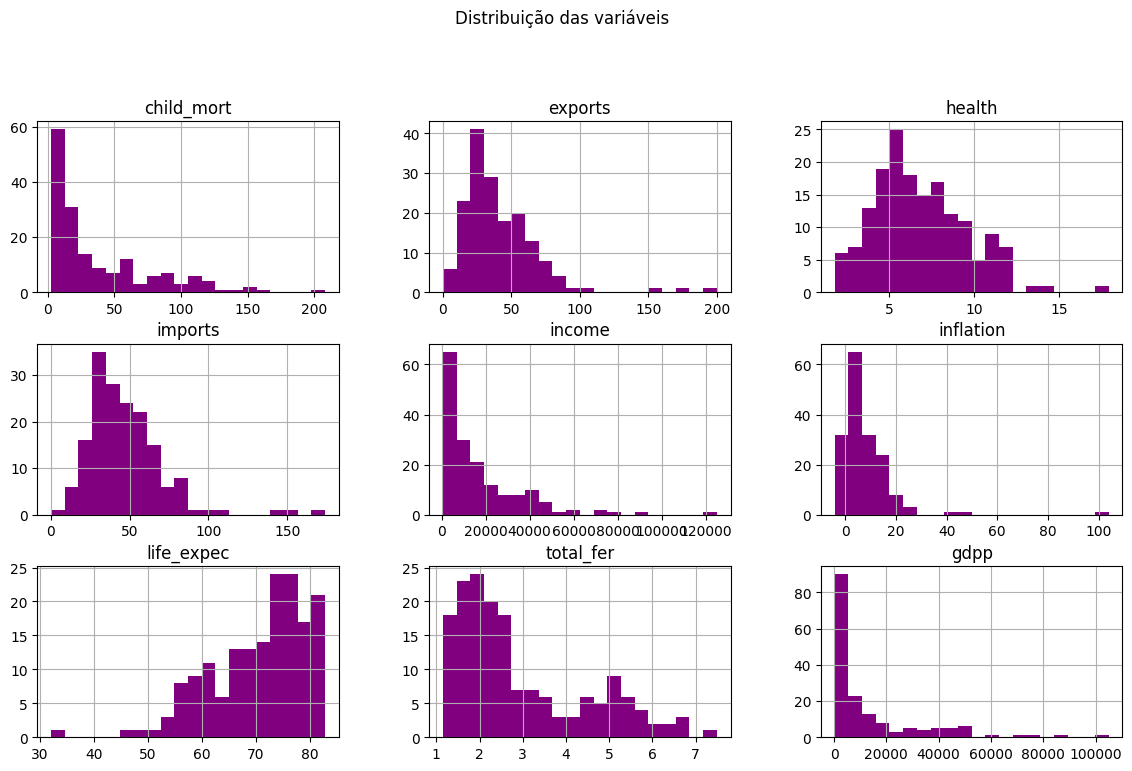

In [6]:
# Seleção automática das colunas numéricas para análises quantitativas
num_cols = df.select_dtypes(include=[np.number]).columns
# Histograma para entender a distribuição de cada variável numérica
plt.figure(figsize=(14,8))
df[num_cols].hist(bins=20, figsize=(14,8), color='purple')
plt.suptitle("Distribuição das variáveis", y=1.02)
plt.show()


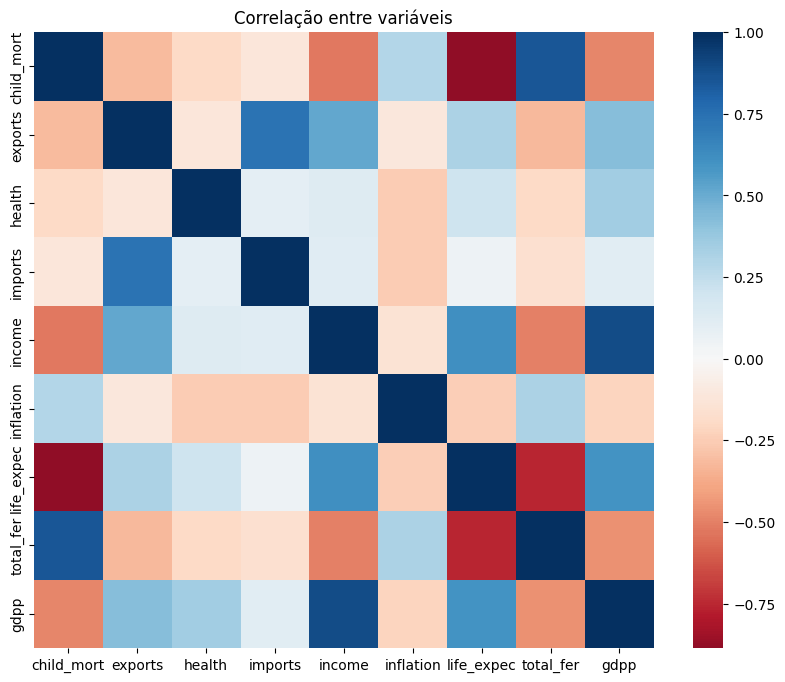

In [7]:
# Matriz de correlação: identifica relações lineares entre variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap='RdBu', center=0, annot=False)
plt.title("Correlação entre variáveis")
plt.show()


In [8]:
# Padronização (média=0, desvio=1) para colocar variáveis na mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])


In [9]:
# Visualização da matriz padronizada (apenas referência)
# Observação: são muitos números; pule esta célula se preferir
print(X_scaled)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


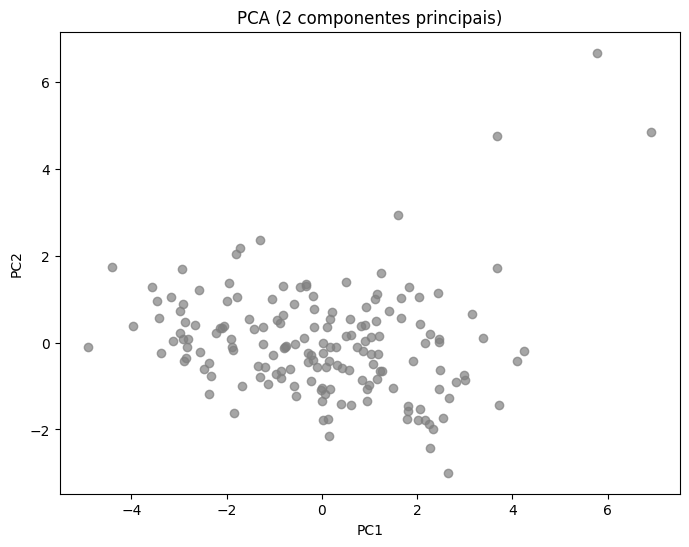

Variância explicada: 63.13 %


In [10]:
# PCA (Análise de Componentes Principais) para reduzir dimensionalidade
# Aqui resumimos as variáveis em 2 componentes para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='gray', alpha=0.7)
plt.title("PCA (2 componentes principais)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
print("Variância explicada:",
 round(sum(pca.explained_variance_ratio_)*100,2), "%")


In [11]:
# Teste de diferentes números de clusters (k)
# Coletamos Silhouette para comparar qualidade entre k
inertias, sil_scores = [], []
K = range(2, 10)
for k in K:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_scaled)
  inertias.append(model.inertia_)
  sil_scores.append(silhouette_score(X_scaled, model.labels_))


c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning

c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


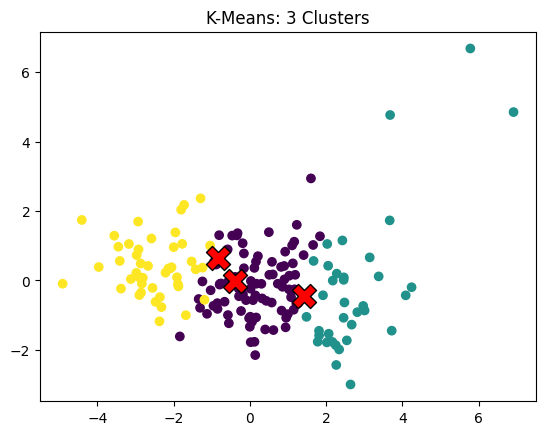

In [24]:
# K-Means com k=3 (experimento inicial para comparação)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 marker='X', s=300, c='red', edgecolor='black')
# Observação: centros do K-Means estão no espaço original, não no PCA
plt.title("K-Means: 3 Clusters")
plt.show()


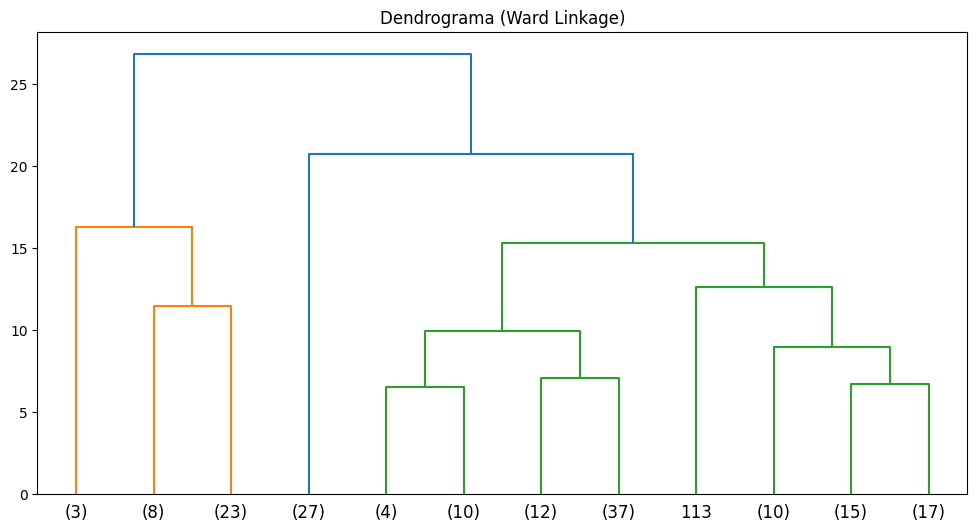

In [13]:
# Dendrograma (clustering hierárquico) para inspecionar estrutura dos grupos
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title("Dendrograma (Ward Linkage)")
plt.show()

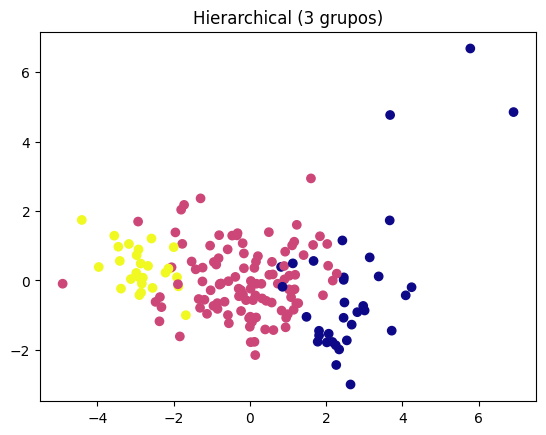

In [14]:
# Agrupamento hierárquico (Ward) com k=3 para comparação
from sklearn.cluster import AgglomerativeClustering
model_h = AgglomerativeClustering(
 n_clusters=3,
 linkage='ward'
)
labels_h = model_h.fit_predict(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1],
 c=labels_h, cmap='plasma')
plt.title("Hierarchical (3 grupos)")
plt.show()


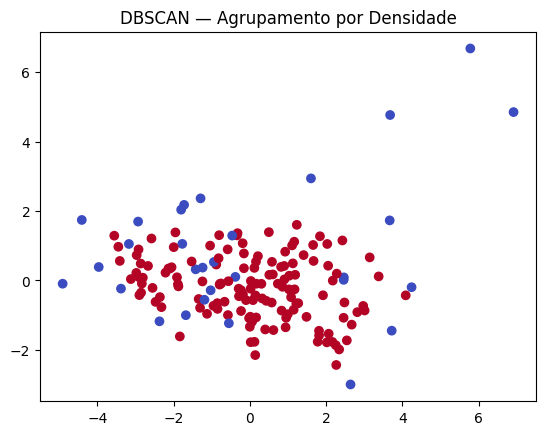

Clusters: 1, Ruído: 30 pontos


In [15]:
# DBSCAN (agrupamento por densidade)
# Observação: parâmetros eps/min_samples precisam de ajuste fino conforme o dado
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
labels_db = db.fit_predict(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='coolwarm')
plt.title("DBSCAN — Agrupamento por Densidade")
plt.show()
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = list(labels_db).count(-1)
print(f"Clusters: {n_clusters}, Ruído: {n_noise} pontos")

In [16]:
# Função de avaliação: imprime Silhouette para diferentes rótulos
# Silhouette varia de -1 a 1 (quanto maior, melhor separação)
def evaluate_model(name, labels, X):
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        print(f"{name}: Silhouette = {score:.3f}")

evaluate_model("K-Means (k=3)",
 KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled),
 X_scaled)
evaluate_model("Hierarchical (k=3)", labels_h, X_scaled)
evaluate_model("DBSCAN", labels_db, X_scaled)

K-Means (k=3): Silhouette = 0.286
Hierarchical (k=3): Silhouette = 0.246
DBSCAN: Silhouette = 0.288


c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# ARI compara clusters com rótulos verdadeiros; aqui não temos rótulos
print("Sem rótulos verdadeiros no conjunto Country-data; ARI não se aplica.")

Sem rótulos verdadeiros no conjunto Country-data; ARI não se aplica.


In [18]:
# Busca simples de hiperparâmetros para K-Means (grade pequena)
from itertools import product
params = {
 'n_clusters': [2, 3, 4, 5],
 'init': ['k-means++', 'random'],
 'n_init': [10, 20, 30]
}
best_score, best_params = -1, None
for combo in product(params['n_clusters'],
 params['init'],
 params['n_init']):
 k, init, n_init = combo
 model = KMeans(n_clusters=k, init=init,
 n_init=n_init, random_state=42)
 labels = model.fit_predict(X_scaled)
 score = silhouette_score(X_scaled, labels)
 if score > best_score:
  best_score, best_params = score, combo

c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\am_cy\git\ambiente_matematica_c

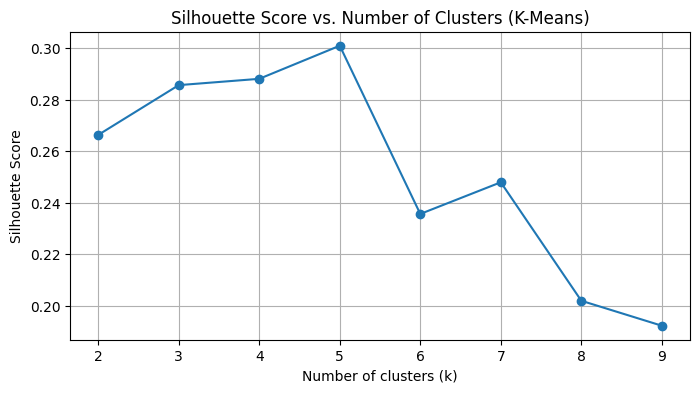

In [19]:
# Curva de Silhouette por número de clusters (k)
plt.figure(figsize=(8, 4))
plt.plot(K, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (K-Means)')
plt.xticks(K)
plt.grid(True)
plt.show()

In [20]:
# Exibe a melhor combinação de hiperparâmetros encontrada para K-Means
print(f"Melhor combinação:")
print(f" n_clusters={best_params[0]}")
print(f" init='{best_params[1]}'")
print(f" n_init={best_params[2]}")
print(f"Melhor Silhouette: {best_score:.3f}")

Melhor combinação:
 n_clusters=4
 init='random'
 n_init=10
Melhor Silhouette: 0.304


c:\Users\am_cy\git\ambiente_matematica_computacional\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


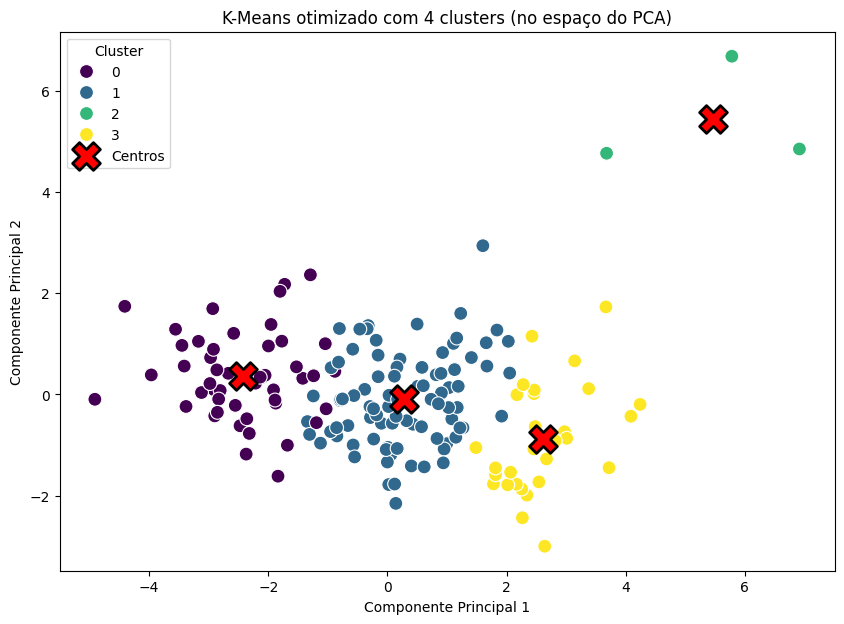

In [21]:
# Treina K-Means com a melhor combinação e colore o PCA pelos rótulos
best_kmeans = KMeans(n_clusters=best_params[0],
 init=best_params[1],
 n_init=best_params[2],
 random_state=42)
labels_final = best_kmeans.fit_predict(X_scaled)
# Projeta os centros do K-Means no espaço do PCA para visualização correta
centers_pca = pca.transform(best_kmeans.cluster_centers_)
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
 hue=labels_final, palette='viridis', s=100, legend='full')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
 marker='X', s=400, c='red', edgecolor='black', linewidth=2, label='Centros')
plt.title(f"K-Means otimizado com {best_params[0]} clusters (no espaço do PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.show()

In [22]:
# Adiciona os rótulos de cluster ao DataFrame original
# e calcula o perfil médio (apenas colunas numéricas)
df['cluster'] = labels_final
cluster_profiles = df.groupby('cluster')[num_cols].mean()
print(cluster_profiles.T)

cluster               0             1             2             3
child_mort    92.366667     20.696552      4.133333      4.982759
exports       28.546229     41.857241    176.000000     45.703448
health         6.296458      6.292874      6.793333      9.245862
imports       41.443040     48.568966    156.666667     39.513793
income      3937.770833  13275.287356  64033.333333  45762.068966
inflation     11.915938      7.368862      2.468000      2.727793
life_expec    59.345833     73.088506     81.433333     80.386207
total_fer      4.953958      2.272989      1.380000      1.814828
gdpp        1902.916667   7161.770115  57566.666667  44065.517241


In [23]:
# Lista de países por cluster (útil para interpretação de grupos)
# Exibe também a contagem de países em cada cluster
for c, sub in df.groupby('cluster'):
    countries = sub['country'].tolist()
    print(f"Cluster {c} — {len(countries)} países")
    print(", ".join(countries))
    print("-" * 80)



Cluster 0 — 48 países
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Myanmar, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
--------------------------------------------------------------------------------
Cluster 1 — 87 países
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indones